AI Microscope-Phase 1 : Data Understanding

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!cp -r "/content/drive/MyDrive/AI-Microscope/data" /content/

In [13]:
import os
data_dir = "/content/data"
classes = ["Parasitized","Uninfected"]
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    num_images = len(os.listdir(cls_path))
    print(f"{cls}: {num_images} images")


Parasitized: 13794 images
Uninfected: 13785 images


In [14]:
import os

data_dir = "data"
classes = ["Parasitized", "Uninfected"]

for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    if not os.path.exists(cls_path):
        os.makedirs(cls_path)
        print(f"Created directory: {cls_path}")
    else:
        print(f"Directory already exists: {cls_path}")


Directory already exists: data/Parasitized
Directory already exists: data/Uninfected


In [15]:
import os

data_dir = "/content/drive/MyDrive/AI-Microscope/data"
print(os.listdir(data_dir))

['Parasitized', 'Uninfected']


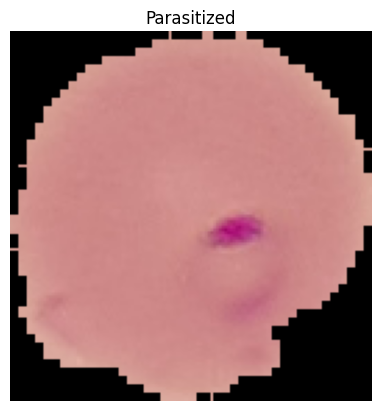

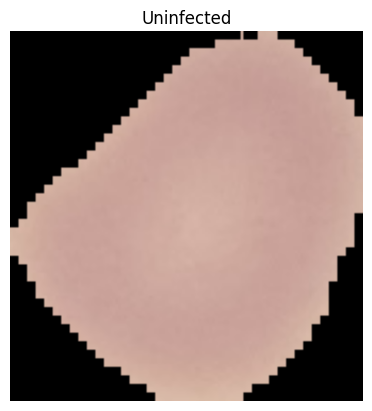

In [10]:

import random
import cv2
import matplotlib.pyplot as plt

def show_random_images(class_name):
    class_path = os.path.join(data_dir, class_name)
    img_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
    plt.show()

show_random_images("Parasitized")
show_random_images("Uninfected")



In [11]:
import numpy as np
def get_image_shapes(num_samples=100):
    shapes = []
    for cls in classes:
        class_path = os.path.join(data_dir, cls)
        images = os.listdir(class_path)[:num_samples]
        for img_name in images:
            img_name = os.path.join(class_path, img_name)
            img = cv2.imread(img_name)
            shapes.append(img.shape)
    return shapes

shapes = get_image_shapes()
print("Sample image shapes : ")
for s in shapes[:10]:
    print(s)


Sample image shapes : 
(148, 160, 3)
(121, 136, 3)
(385, 247, 3)
(133, 160, 3)
(124, 130, 3)
(181, 190, 3)
(172, 163, 3)
(178, 151, 3)
(172, 157, 3)
(169, 154, 3)


In [ ]:
label_class = {
    "Parasitized" : 1,
    "Uninfected" : 0
}

In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms

In [ ]:
class MalariaDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform

        self.image_paths = []
        self.labels = []

        self.label_map = {
            "Parasitized": 1,
            "Uninfected": 0
        }

        for class_name, label in self.label_map.items():
            class_dir = os.path.join(data_dir, class_name)

            # ✅ CHECK FIRST
            if not os.path.exists(class_dir):
                raise FileNotFoundError(f"Folder not found: {class_dir}")

            valid_extensions = (".png", ".jpg", ".jpeg")

            for img_name in os.listdir(class_dir):
                if img_name.lower().endswith(valid_extensions):
                    self.image_paths.append(os.path.join(class_dir, img_name))
                    self.labels.append(label)



    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            image = Image.open(img_path).convert("RGB")
        except Exception:
            # If image is corrupted, skip to next valid one
            return self.__getitem__((idx + 1) % len(self.image_paths))

        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485,0.456,0.406],
        std = [0.229,0.224,0.225]
    )
])

In [ ]:
dataset = MalariaDataset(
    data_dir="/content/data",
    transform=transform
)

print("Total samples:", len(dataset))

In [ ]:
import os

data_dir = "/content/data"
print(os.listdir(data_dir))

In [ ]:
import os

data_dir = "/content/data"
print(os.listdir(data_dir))

In [ ]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print("Train samples:", len(train_dataset))
print("Validation samples:", len(val_dataset))

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True
)

In [ ]:
val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False
)

In [ ]:
images, labels = next(iter(train_loader))

print("Batch image shape:", images.shape)
print("Batch labels shape:", labels.shape)

CNN ARCHEOLOGY-------------------------------------------------------------------------------------

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # Convolution layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)

        # Fully connected layer
        self.fc1 = nn.Linear(32 * 56 * 56, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(x.size(0), -1)  # flatten
        x = self.fc1(x)

        return x

In [ ]:
def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))

    x = x.view(x.size(0), -1)  # flatten
    x = self.fc1(x)

    return x

In [ ]:
model = SimpleCNN()
print(model)

CHOOSING LOSS FUNCTION

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
images, labels = next(iter(train_loader))
outputs = model(images)
print("Output shape:", outputs.shape)


TRAINING LOOP(CPU/GPU)--------------------------------------------------------------------------------

In [ ]:
import numpy as np

labels_array = np.array(dataset.labels)

num_pos = (labels_array == 1).sum()
num_neg = (labels_array == 0).sum()

pos_weight = num_neg / num_pos
print("Positive class weight:", pos_weight)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Recreate model and optimizer for a fair experiment
model = SimpleCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Weighted loss
pos_weight_tensor = torch.tensor([pos_weight], dtype=torch.float32).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)

num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}")


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

model.eval()

all_probs = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)

        outputs = model(images)
        probs = torch.sigmoid(outputs).cpu().numpy()

        all_probs.extend(probs)
        all_labels.extend(labels.numpy())

all_probs = np.array(all_probs).flatten()
all_labels = np.array(all_labels)

thresholds = [0.5, 0.4, 0.3, 0.2]

for t in thresholds:
    preds = (all_probs > t).astype(int)

    acc = accuracy_score(all_labels, preds)
    prec = precision_score(all_labels, preds)
    rec = recall_score(all_labels, preds)

    print(f"\nThreshold = {t}")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")


NEW CHAPTER BEGINS------------------------------------------

In [ ]:
!pip install -q timm albumentations

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import timm
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [ ]:
import os
import shutil # Import shutil for rmtree

# Define a new root directory that ImageFolder will use
imagefolder_root = "/content/malaria_cells_for_imagefolder"

# Ensure the clean root directory exists and is empty from previous runs
if os.path.exists(imagefolder_root):
    shutil.rmtree(imagefolder_root) # Remove previous runs
os.makedirs(imagefolder_root, exist_ok=True)

# Define the actual class folders that should be included
desired_classes = ["Parasitized", "Uninfected"]

# Create symbolic links from the original data_dir to the new imagefolder_root
# This avoids copying large amounts of data and keeps the structure clean for ImageFolder
for cls_name in desired_classes:
    source_class_path = os.path.join(data_dir, cls_name) # data_dir is still '/content/data'
    destination_class_path = os.path.join(imagefolder_root, cls_name)

    if os.path.exists(source_class_path):
        os.symlink(source_class_path, destination_class_path, target_is_directory=True)
    else:
        print(f"Warning: Source class directory '{source_class_path}' not found. Please check your data setup.")

# Now, use the new, clean imagefolder_root for datasets.ImageFolder
train_dataset = datasets.ImageFolder(imagefolder_root, transform=train_transform)

# 80-20 split
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(
    train_dataset, [train_size, val_size]
)

val_dataset.dataset.transform = val_transform

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True,
                          num_workers=2, pin_memory=True)

val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False,
                        num_workers=2, pin_memory=True)

print("Train:", len(train_dataset), " Val:", len(val_dataset))


In [ ]:
# ================================
# 6. DataLoaders (GPU-optimized)
# ================================
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

In [ ]:
# ================================
# 7. EfficientNet-B0 model
# ================================
model = timm.create_model(
    "efficientnet_b0",
    pretrained=True,
    num_classes=1
)
model = model.to(device)

In [ ]:
# ================================
# 8. Loss, optimizer, scheduler, AMP
# ================================
criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max=5
)

scaler = torch.amp.GradScaler("cuda")

In [ ]:
# ================================
# 9. Training loop
# ================================
num_epochs = 5

for epoch in range(num_epochs):

    # ---- TRAIN ----
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()

        # mixed precision forward
        with torch.amp.autocast('cuda'):
            outputs = model(images)
            loss = criterion(outputs, labels)

        # backward with scaler
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()

    scheduler.step()
    train_loss = running_loss / len(train_loader)

In [ ]:
# ---- VALIDATION ----
model.eval()
val_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        val_loss += loss.item()

        preds = (torch.sigmoid(outputs) > 0.5).int()
        correct += (preds == labels.int()).sum().item()
        total += labels.size(0)

val_loss /= len(val_loader)
val_acc = correct / total


In [ ]:
torch.save(model.state_dict(), "/content/efficientnet_malaria.pth")
print("Model saved to /content/efficientnet_malaria.pth")

In [ ]:
import torch
import numpy as np
from sklearn.metrics import (
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt

model.eval()

all_probs = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)

        probs = torch.sigmoid(outputs).cpu().numpy()
        all_probs.extend(probs)
        all_labels.extend(labels.numpy())

all_probs = np.array(all_probs).flatten()
all_labels = np.array(all_labels)

# ================= ROC-AUC =================
roc_auc = roc_auc_score(all_labels, all_probs)
print("ROC-AUC:", round(roc_auc, 4))

# ================= Precision-Recall Curve =================
precision, recall, _ = precision_recall_curve(all_labels, all_probs)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()

# ================= Confusion Matrix (threshold = 0.5) =================
preds = (all_probs > 0.5).astype(int)

cm = confusion_matrix(all_labels, preds)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(all_labels, preds, digits=4))


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
from PIL import Image

model.eval()

In [ ]:
target_layer = model.conv_head

features = []
gradients = []

def forward_hook(module, inp, out):
    features.append(out)

def backward_hook(module, grad_in, grad_out):
    gradients.append(grad_out[0])

target_layer.register_forward_hook(forward_hook)
target_layer.register_full_backward_hook(backward_hook)


In [ ]:
def generate_gradcam(image_path):

    # preprocessing (same as validation)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            [0.485, 0.456, 0.406],
            [0.229, 0.224, 0.225]
        )
    ])

    img = Image.open(image_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0).to(device)

    # forward
    output = model(input_tensor)

    # backward from positive class
    model.zero_grad()
    output.backward()

    # get gradients & features
    grads = gradients[-1].cpu().data.numpy()[0]
    fmap = features[-1].cpu().data.numpy()[0]

    # global average pooling on gradients
    weights = np.mean(grads, axis=(1, 2))

    # weighted combination
    cam = np.zeros(fmap.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * fmap[i]

    # ReLU
    cam = np.maximum(cam, 0)

    # normalize
    cam = cam / cam.max()

    # resize to original image
    cam = cv2.resize(cam, (224, 224))

    return img, cam


In [ ]:
def show_gradcam(image_path):

    img, cam = generate_gradcam(image_path)

    img_np = np.array(img.resize((224, 224)))

    heatmap = cv2.applyColorMap(
        np.uint8(255 * cam),
        cv2.COLORMAP_JET
    )

    overlay = heatmap * 0.4 + img_np

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(img_np)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Grad-CAM")
    plt.imshow(cam, cmap="jet")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Overlay")
    plt.imshow(overlay.astype(np.uint8))
    plt.axis("off")

    plt.show()


In [ ]:
import os
import random

data_root = "/content/data"

def get_random_image():
    # choose random class
    cls = random.choice(["Parasitized", "Uninfected"])

    class_path = os.path.join(data_root, cls)

    # choose random image inside class
    img_name = random.choice(os.listdir(class_path))

    return os.path.join(class_path, img_name), cls


In [ ]:
def show_random_gradcam():
    image_path, label = get_random_image()

    print("True class:", label)
    print("Image path:", image_path)

    show_gradcam(image_path)

In [ ]:
for _ in range(3):
    show_random_gradcam()

In [ ]:
!git config --global user.email "devansh23fs@gmail.com"
!git config --global user.name "Devansh232406"

In [18]:
%%writefile app.py
print("Hello, this is my Streamlit app file.")

Writing app.py


In [21]:
%%writefile /content/drive/MyDrive/AI-Microscope/requirements.txt
streamlit
torch
torchvision
timm
numpy
opencv-python
pillow
scikit-learn
matplotlib

Writing /content/drive/MyDrive/AI-Microscope/requirements.txt
